In [146]:
import numpy as np
import matplotlib.pyplot as plt
import copy


In [147]:
class Simulator:
    def __init__(self, y_init=0, grid_points=1000, t_init=0, t_end=10):
        self.t_init = t_init
        self.t_end = t_end
        self.y_init = y_init
        self.N = grid_points
        self.dt = float(t_end - t_init) / self.N

        self.ts = np.arange(t_init, t_end + self.dt, self.dt)

    def simulate(self):
        pass

    def get_ts(self):
        return copy.copy(self.ts)

In [148]:
class Euler_Maruyama_Simulator(Simulator):
    def __init__(self, funcs, y_init=0, grid_points=1000, t_init=0, t_end=10):
        self.a = funcs[0]
        self.b = funcs[1]

        super().__init__(y_init, grid_points, t_init, t_end)

    def dW(delta_t):
        return np.random.normal(scale=np.sqrt(delta_t))

    def simulate(self):
        ys = np.zeros(self.ts.size)
        ys[0] = self.y_init

        t = self.t_init
        dt = self.dt
        for i in range(1, self.ts.size):
            t = t + dt
            y = ys[i - 1]
            ys[i] = (
                y + self.a(y, t) * dt + self.b(y, t) * Euler_Maruyama_Simulator.dW(dt)
            )
        return ys


In [149]:
def simulations_viewer(num_sims, simulator, show_log=False):
    ts = simulator.get_ts()
    N = ts.shape[0]

    sims = np.ndarray((num_sims, N))
    for i in range(num_sims):
        ys = simulator.simulate()
        sims[i] = ys
        plt.plot(ts, ys)

    plt.xlabel("time (s)")
    if show_log:
        plt.yscale("log")

    h = plt.ylabel("y")
    h.set_rotation(0)
    plt.show()

    return sims


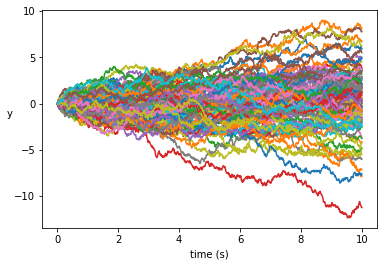

array([[ 0.00000000e+00, -3.33689732e-02, -8.44715887e-02, ...,
         2.86215625e+00,  2.95042544e+00,  2.91713523e+00],
       [ 0.00000000e+00, -5.09222256e-02, -1.08355687e-01, ...,
        -7.91509517e+00, -7.81260830e+00, -7.81302229e+00],
       [ 0.00000000e+00, -7.63887736e-02, -1.80941724e-01, ...,
        -1.46843174e+00, -1.46915204e+00, -1.46552925e+00],
       ...,
       [ 0.00000000e+00,  5.65602961e-03,  1.93913738e-01, ...,
        -1.87446216e+00, -1.84722642e+00, -1.99968757e+00],
       [ 0.00000000e+00, -8.79591966e-02, -5.29515453e-02, ...,
        -4.33988812e+00, -4.19324202e+00, -4.21185982e+00],
       [ 0.00000000e+00,  5.08411537e-02,  2.05455898e-02, ...,
        -2.18301174e+00, -2.27650099e+00, -2.20344008e+00]])

In [150]:
def Brownian_funcs():
    def a(y, t):
        return 0

    def b(y, t):
        return 1

    return a, b


em_brownian = Euler_Maruyama_Simulator(Brownian_funcs())
simulations_viewer(100, em_brownian)


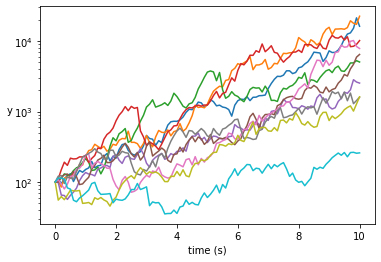

array([[  100.        ,   111.78476217,    94.63421815, ...,
        15167.36753494, 21361.37021916, 16236.84581286],
       [  100.        ,   103.31934729,    84.79827814, ...,
        17899.00818902, 17292.25788574, 22508.37802199],
       [  100.        ,   108.45075077,   112.62378289, ...,
         4896.88201463,  5271.30977669,  5047.59301125],
       ...,
       [  100.        ,   120.87489452,   123.30639596, ...,
         1293.26533738,  1432.55345064,  1599.00756323],
       [  100.        ,    55.39726262,    62.06072624, ...,
         1015.12602528,  1280.80155649,  1617.36839292],
       [  100.        ,   113.93497125,   113.43599064, ...,
          264.05175151,   256.12053798,   259.11745932]])

In [151]:
def Geometric_Brownian_funcs(mu, sigma):
    def a(y, t):
        return mu * y

    def b(y, t):
        return sigma * y

    return a, b


em_geometirc_brownian = Euler_Maruyama_Simulator(
    Geometric_Brownian_funcs(0.5, 0.5), y_init=100, t_end=10, grid_points=100
)
simulations_viewer(10, em_geometirc_brownian, show_log=True)


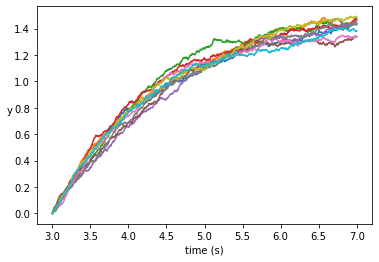

array([[ 0.00000000e+00, -3.20341934e-04,  1.13581104e-02, ...,
         1.44003134e+00,  1.44018800e+00,  1.44056661e+00],
       [ 0.00000000e+00,  1.21189850e-02,  2.17867903e-02, ...,
         1.45679284e+00,  1.45869737e+00,  1.46070274e+00],
       [ 0.00000000e+00,  2.57719530e-03,  6.75166982e-03, ...,
         1.43268337e+00,  1.43116036e+00,  1.42922333e+00],
       ...,
       [ 0.00000000e+00,  7.25746480e-03,  6.48339361e-03, ...,
         1.45379485e+00,  1.45782205e+00,  1.46692100e+00],
       [ 0.00000000e+00, -4.31116945e-03, -1.97321218e-03, ...,
         1.49273881e+00,  1.48880124e+00,  1.48684545e+00],
       [ 0.00000000e+00, -3.46537532e-04,  8.90627945e-03, ...,
         1.38136765e+00,  1.38430588e+00,  1.38091988e+00]])

In [152]:
def Ornstein_Uhlenbeck_funcs(theta, mu, sigma):
    def a(y, t):
        return theta * (mu - y)

    def b(y, t):
        return sigma

    return a, b


ornstein_unlenbeck_process = Euler_Maruyama_Simulator(
    Ornstein_Uhlenbeck_funcs(0.7, 1.5, 0.06),
    t_init=3,
    t_end=7,
    y_init=0,
    grid_points=1000,
)
simulations_viewer(10, ornstein_unlenbeck_process)


In [153]:
class Fractional_Gaussian_Simulator:
    def __init__(self, H):
        self.h = H
        self.rho = [1]

    def __generate_rho_till(self, n):
        H = 2 * self.h
        for i in range(len(self.rho), n):
            self.rho.append(((i + 1) ** H + (i - 1) ** H - 2 * (i ** H)) / 2)

    def get_cov(self, n):
        cov = np.ndarray((n, n))
        self.__generate_rho_till(n)
        for ind, r in enumerate(self.rho):
            np.fill_diagonal(cov[ind:], r)
            np.fill_diagonal(cov[:, ind:], r)
        return cov

    def simulate(self, n):
        cov = np.ndarray((n, n))
        self.__generate_rho_till(n)
        for ind, r in enumerate(self.rho):
            np.fill_diagonal(cov[ind:], r)
            np.fill_diagonal(cov[:, ind:], r)

        result = np.random.multivariate_normal(np.zeros(n), cov, check_valid="ignore")
        return result


class Fractional_Brownian_Simulator(Simulator):
    def __init__(self, H, y_init=0, grid_points=1000, t_init=0, t_end=10):
        super().__init__(y_init, grid_points, t_init, t_end)
        self.h = H
        self.factor = ((t_end - t_init) / self.N) ** H

        self.fGn = Fractional_Gaussian_Simulator(H)
        self.ts -= t_init

    def simulate(self):
        ys = self.fGn.simulate(self.N)
        ys = ys * self.factor
        ys = np.insert(ys, 0, self.y_init)
        ys = np.cumsum(ys)

        return ys
    
    def get_ts(self):
        return self.ts + self.t_init


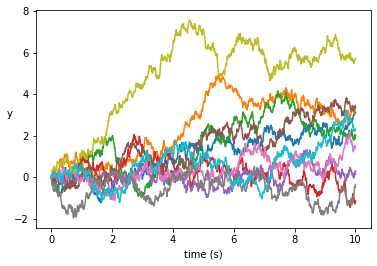

array([[ 0.        ,  0.06148268, -0.07589994, ...,  3.0669493 ,
         3.14397192,  3.10712176],
       [ 0.        ,  0.04791367,  0.14125737, ...,  3.18716607,
         3.25514545,  3.33218133],
       [ 0.        , -0.08277874, -0.1500763 , ...,  2.04006301,
         1.86567798,  2.01257148],
       ...,
       [ 0.        , -0.02614371, -0.19032092, ..., -0.51280271,
        -0.4892782 , -0.35371635],
       [ 0.        ,  0.14662487,  0.19835004, ...,  5.6504955 ,
         5.65587266,  5.71891974],
       [ 0.        ,  0.05360597,  0.10095406, ...,  2.26588982,
         2.23965883,  2.30545505]])

In [154]:
fBm = Fractional_Brownian_Simulator(0.5)
simulations_viewer(10, fBm)


### 3/1 To do list
- Find statistics of the sample path
- Check covariance
- Estimate the heurst parameter
- Compare the complexity of implementations

Estimating Heurst Parameter

SIMULATION AND IDENTIFICATION OF THE FRACTIONAL BROWNIAN MOTION: A BIBLIOGRAPHICAL AND COMPARATIVE STUDY section 4.2.1

In [155]:
from scipy import stats


class FBM_Heurst_Estimator:
    @staticmethod
    def get_periodogram(time_series):
        N = time_series.size
        e = np.exp(-1j * np.arange(N))

        freq = np.arange(0, N + 1) * 2 * np.pi / N

        def func(ind):
            r = np.power(e, ind)
            r = np.dot(time_series, r)
            r = np.power(np.absolute(r), 2)
            return r / (2 * np.pi * N)

        r = np.vectorize(func)(freq)
        return freq, r

    @staticmethod
    def log_pgm_method(fbm):
        fgn = fbm[1:] - fbm[:-1]
        freq, pgm = FBM_Heurst_Estimator.get_periodogram(fgn)

        lfreq = np.log(freq[1:-1])
        lpgm = np.log(pgm[1:-1])

        s, _, _, _, _ = stats.linregress(lfreq, lpgm)
        return (1 - s) / 2

    @staticmethod
    def empiric_var_method(fbm):
        N = fbm.size - 1

        vd = fbm[2:] - fbm[1:-1]
        vd = np.sum(np.power(vd, 2)) / (N - 1)

        vd2 = fbm[3:] - fbm[1:-2]
        vd2 = np.sum(np.power(vd2, 2)) / (N - 2)

        return np.log(vd2 / vd) / (2 * np.log(2))


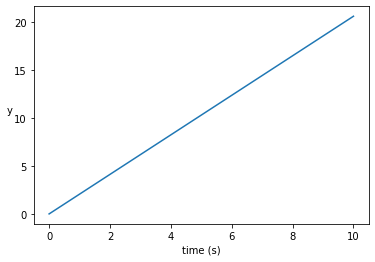

In [156]:
fBm = Fractional_Brownian_Simulator(1)
ys = fBm.simulate()

plt.plot(fBm.get_ts(), ys)
plt.xlabel("time (s)")
h = plt.ylabel("y")
h.set_rotation(0)
plt.show()


In [157]:
FBM_Heurst_Estimator.empiric_var_method(ys)


1.0000000001745004

Covariance Testing

ON HYPOTHESIS TESTS FOR COVARIANCE MATRICES UNDER MULTIVARIATE NORMALITY section 2.1

In [158]:
class HypTestAcceptRegion:
    def acceptRegionString(self):
        pass

    def acceptFunc(self):
        pass


def hyp_test(test_stat, acceptor, test_name=None, verbose=True):
    if verbose and test_name is not None:
        print(test_name)
    
    if acceptor.acceptFunc(test_stat):
        if verbose:
            print("Accept Null Hypothesis (H_0)")
        result = True
    else:
        if verbose:
            print("Reject Null Hypothesis, accept alternative hypothesis (H_1)")
        result = False

    if verbose:
        print(f"Test Statistics: {test_stat}")
        print(f"Accept Region: {acceptor.acceptRegionString()}")

    return result

def get_estimated_cov_matrix(X, mean=None):
    if mean == None:
        mean = np.mean(X, axis=0)
    
    n = X.shape[0]
    centralisedX = X - mean
    A = np.apply_along_axis(lambda x: np.outer(x, x), 1, centralisedX)
    A = np.sum(A, axis=0)

    return A / n

def cov_matrix_lrt_stat(X, cov0, mean=None):
    n = X.shape[0]
    A = get_estimated_cov_matrix(X) * n

    p = A.shape[0]
    cov0_inv = np.linalg.inv(cov0)

    result = -p * n
    if mean is None:
        result = (
            result
            + p * n * np.log(n)
            - n * np.log(np.linalg.det(A.dot(cov0_inv)))
            + np.trace(cov0_inv.dot(A))
        )
    else:
        est = A / n
        result = (
            result
            - n * np.log(np.linalg.det(cov0_inv.dot(est)))
            + n * np.trace(cov0_inv.dot(est))
        )

    return result


class CovMatrixLrtAcceptRegion(HypTestAcceptRegion):
    def __init__(self, sigLevel, p):
        super().__init__()
        self.sigLevel = sigLevel
        self.p = p
        self.maxAccept = stats.chi2.ppf(sigLevel, p * (p + 1) // 2)

    def acceptRegionString(self):
        return f"[0, {self.maxAccept}]"

    def acceptFunc(self, v):
        return v <= self.maxAccept


def cov_matrix_lrt_test(timeSeries, covMatrix, mean=None, sig_level=0.90, verbose=False):
    stat = cov_matrix_lrt_stat(timeSeries, covMatrix, mean=mean)
    return hyp_test(
        stat, CovMatrixLrtAcceptRegion(sig_level, p), 
        test_name="Covariance Matrix LRT",
        verbose=verbose
    )


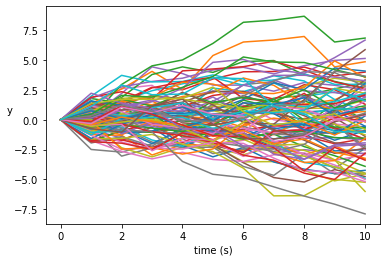

Covariance Matrix LRT
Accept Null Hypothesis (H_0)
Test Statistics: 55.318886719018565
Accept Region: [0, 82.29211682919967]


True

In [159]:
H = 0.5
sig_level = 0.99

fGn = Fractional_Gaussian_Simulator(H)
fBm = Fractional_Brownian_Simulator(H, grid_points=10)
fBms = simulations_viewer(100, fBm)

fGns = fBms[:, 1:] - fBms[:, :-1]
p = fGns.shape[1]
cov = fGn.get_cov(p) * fBm.factor ** 2

cov_matrix_lrt_test(fGns, cov, mean=np.zeros(p), sig_level=sig_level, verbose=True)


Chi Square Test for fractional gaussian noise

Given a sample path fraction gaussian noise $X$, \
$H_0: \text{Heurst parameter} = H$ \
$H_1: \text{Heurst parameter} \neq H$

Thesis 3.2.2

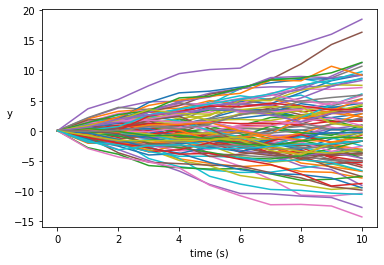

Accepted 86 out of 100 tests


In [160]:
class FGnChiSquareAcceptRegion(HypTestAcceptRegion):
    def __init__(self, sigLevel, N):
        super().__init__()
        self.sigLevel = sigLevel
        self.N = N
        self.maxAccept = stats.chi2.ppf(sigLevel, N)

    def acceptRegionString(self):
        return f"[0, {self.maxAccept}]"
    
    def acceptFunc(self, v):
        return v <= self.maxAccept

def fGn_heurst_chi2_test(H, time_series, factor, sig_level=0.90, verbose=False):
    fGn = Fractional_Gaussian_Simulator(H)
    cov = fGn.get_cov(time_series.size) * factor ** 2
    L = np.linalg.cholesky(cov)
    L_inv = np.linalg.inv(L)

    Z = np.dot(L_inv, time_series)
    stat = np.sum(np.power(Z, 2))
    return hyp_test(
        stat, FGnChiSquareAcceptRegion(sig_level, time_series.size), 
        test_name="Fractional Gaussian Noise Chi Square Test",
        verbose=verbose
    )

def fBm_heurst_chi2_test(H, time_series, factor, sig_level=0.90, verbose=False):
    fGn = time_series[1:] - time_series[:-1]
    return fGn_heurst_chi2_test(H, fGn, factor, sig_level=sig_level, verbose=verbose)

H = 0.75
total_sim= 100

fBm = Fractional_Brownian_Simulator(H, grid_points=10)
fBms = simulations_viewer(total_sim, fBm)

hypothesisH = 0.75
sig_level = 0.90

accept_count = 0

for ts in fBms:
    r = fBm_heurst_chi2_test(hypothesisH, ts, fBm.factor, sig_level=sig_level, verbose=False)
    accept_count += (1 if r else 0)

print(f"Accepted {accept_count} out of {total_sim} tests")



$$
B_H(t) = \int^t_0 K_H(t, s) dB(s)
$$
where
$$
K_H(t, s) = \frac{(t-s)^{H-\frac{1}{2}}}{\Gamma(H+\frac{1}{2})}(_2F_1(H-\frac{1}{2};\frac{1}{2} - H; H+\frac{1}{2}; 1-\frac{t}{s}))
$$

It can be approximated as:
$$
B_H(t_j) = \frac{n}{T}\sum^{j-1}_{i=0}(\int^{t_{i+1}}_{t_{i}}(K_H(t_j, s)ds) \delta B_i)
$$

In [273]:
import scipy.special as sc
import scipy.integrate as sc_int

class FractionalBrownianSimulator2(Simulator):
    def __init__(self, H, y_init=0, grid_points=1000, t_init=0, t_end=10):
        super().__init__(y_init, grid_points, t_init, t_end)
        self.h = H
        self.factor = ((t_end - t_init) / self.N) ** H

        self.fGn = Fractional_Gaussian_Simulator(H)
        self.ts -= t_init

    @staticmethod
    def K_H(t, s, H):
        result = sc.hyp2f1(H-0.5, 0.5-H, H+0.5, 1-t/s)
        result *= (t-s)**(H-0.5)
        result /= sc.gamma(H+0.5)

        return result
    
    @staticmethod
    def __integral_help(t_from, t_end, t, H):
        f = lambda s : FractionalBrownianSimulator2.K_H(t, s, H)
        return sc_int.quadrature(f, t_from, t_end)[0]

    @staticmethod
    def __get_tj(ts, brownian, j, H, n, T):
        if j == 0:
            return 0

        r = np.ndarray(j)
        for i, a, b in zip(range(j), ts[:j], ts[1:j+1]):
            r[i] = FractionalBrownianSimulator2.__integral_help(
                a, b, ts[j], H
            )
            
        r = r.dot(brownian[:j]) * n / T

        return r

    def simulate(self):
        n = self.N + 1
        T = self.t_end - self.t_init
        brownian = np.random.normal(size=n) * np.sqrt(T / n)
        
        ys = np.ndarray(self.ts.size)

        for j in range(ys.size):
            ys[j] = FractionalBrownianSimulator2.__get_tj(
                        self.ts, brownian, j, self.h, n, T
                    )
        return ys

    def get_ts(self):
        return self.ts + self.t_init
    
    

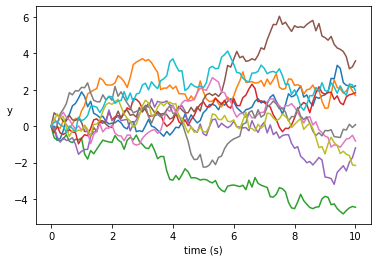

In [276]:
H = 0.5

fBm = FractionalBrownianSimulator2(H, grid_points=100)
fBms = simulations_viewer(10, fBm)

In [224]:
def add(x):
    return x+1

np.apply_along_axis(add, 0, np.arange(10))

<class 'numpy.ndarray'>


array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])